<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/Project%202/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

In [0]:
### This cell is installing keras using pip install

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [1]:
### Here we are importing all the libraries needed for our modelling task

import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
### In this cell, we are loading MNIST hand written digits data to train and test numpy arrays

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


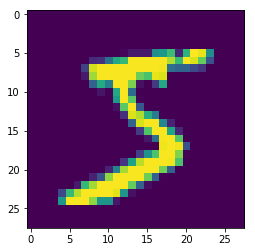

In [3]:
# This cell displays the first value in training data

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
# Here we are reshapping the train and test images to be compatible with the model to be defined

# The images are formatted to dimension Length*Width*Channel
# Since MNIST is a collection of grey scale images, the channel will be 1. So dimension is 28*28*1

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
# Here we are changing the numpy value to float and normalizing them by dividing each value by 255
# The pixel values are scaled between 0 and 1 which is benefecial for our network while backpropagating.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# This cell display first 10 labels in our training data

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# This cell encodes one columns into 10 columns which basically has a flag corresponding to each class
# Here 6th column is the flag for label 5 

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
# Reformatted label data

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# This cell defines our model

# Importing building blocks for NN from keras.layers
from keras.layers import Activation, MaxPooling2D

# Defining model using Keras sequential API
model = Sequential() 

# LRF = Local Receptive Field, GRF = Global Receptive Field

# Layer 1 : Type=Convolution, Input=28*28*1, Kernel Size=3*3*1, No. of Kernels=32, Activation=RELU, LRF=3*3, GRF=3*3, Output=26*26*32
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Layer 2 : Type=Convolution, Input=26*26*32, Kernel Size=3*3*32, No. of Kernels=64, Activation=RELU, LRF=3*3, GRF=5*5, Output=24*24*64
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Layer 3 : Type=Convolution, Input=24*24*64, Kernel Size=3*3*64, No. of Kernels=128, Activation=RELU, LRF=3*3, GRF=7*7, Output=22*22*128
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Layer 4 : Type=Max Pooling, Input=22*22*128, Kernel Size=2*2, LRF=2*2, GRF=8*8, Output=11*11*128
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5 : Type=Convolution, Input=11*11*128, Kernel Size=3*3*128, No. of Kernels=256, Activation=RELU, LRF=3*3, GRF=12*12, Output=9*9*256
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Layer 6 : Type=Convolution, Input=9*9*256, Kernel Size=3*3*256, No. of Kernels=512, Activation=RELU, LRF=3*3, GRF=16*16, Output=7*7*512
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Layer 7 : Type=Convolution, Input=7*7*512, Kernel Size=3*3*512, No. of Kernels=1024, Activation=RELU, LRF=3*3, GRF=20*20, Output=5*5*1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Layer 8 : Type=Convolution, Input=5*5*1024, Kernel Size=3*3*1024, No. of Kernels=2048, Activation=RELU, LRF=3*3, GRF=24*24, Output=3*3*2048
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# Layer 9 : Type=Convolution, Input=3*3*2048, Kernel Size=3*3*2048, No. of Kernels=10, Activation=RELU, LRF=3*3, GRF=28*28, Output=1*1*10
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Layer 10 : Flatten Layer : 1*1*10 to list of length 10
model.add(Flatten())

# Output : Softmax Function 
model.add(Activation('softmax'))

# Display model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [0]:
# Compiling the model

# Loss function used is categorical cross entropy
# Optimizer used is adam
# Evaluation metric used is accuracy

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
# Training process
# Fitting the model on training data

# Batch Size: No of input images seen by the model at a given instance
# Nb Epoch : Number of iterations over the training data
# Verbose : The output display formatting of training process

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 219s 4ms/step - loss: 2.3027 - acc: 0.0987
Epoch 2/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 214s 4ms/step - loss: 2.3026 - a

In [0]:
# Model evaluation on test data

score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
# Model performance on the test data
# Output score tells us the percentage of classes correctly predicted by our model

print(score)

[2.3025851249694824, 0.098]


In [0]:
# Predicting the label on test data

y_pred = model.predict(X_test)

In [0]:
# Comparing the prediction v/s actual for first 9 images in test data

print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


### We can see that the model is not able to predict the label correctly. Infact, the model is giving same probabilty for all classes, which is same as the probability of random prediction 1/10.

# What is wrong with the Network ?

### The possible reason for the bad performance might be the combined effect of the following:


### 1.   Pooling layer too close to input
The max pooling layer is added as the 4th layer in the network after 3 convolution layers. The receptive field when max pooling is applied is just 7x7 which is not good enough to detect edges relevant for the correct classification. Hence max pooling layer is not getting enough information that it can use later to correctly classify the images. The pooling layer should have been little lower in the network to better identify important features than it can carry forward in the network.
### 2.   No pooling layer after the first one to filter out irrelevant features
Toward the lower half of the network, there are too many features generated by 5 layers of convolutions. Just before the final layer, there are 2048 channels suddenly converging into 10. All these happens without any pooling layer to select important channels for network. An extra pooling layer would have helped the network to learn better.

### 3. Too many filters and parameters
The network is too heavy for the given problem with far too many kernels used. The presence of too many kernels creates many irrelevent channels thereby introducing too much noise. The outputs of relevent channels gets ignored due to too many information coming in for the final layer. A much more simpler network should have been used considering the fact that input image is just 28x28.

**Please find the below codes with the suggested changes that helped the model to learn**






#1.  Model with max pooling few layers down in the network

In [13]:
# This cell defines our model

# Importing building blocks for NN from keras.layers
from keras.layers import Activation, MaxPooling2D

# Defining model using Keras sequential API
model = Sequential() 

# LRF = Local Receptive Field, GRF = Global Receptive Field

# Layer 1 : Type=Convolution, Input=28*28*1, Kernel Size=3*3*1, No. of Kernels=32, Activation=RELU, LRF=3*3, GRF=3*3, Output=26*26*32
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Layer 2 : Type=Convolution, Input=26*26*32, Kernel Size=3*3*32, No. of Kernels=64, Activation=RELU, LRF=3*3, GRF=5*5, Output=24*24*64
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Layer 3 : Type=Convolution, Input=24*24*64, Kernel Size=3*3*64, No. of Kernels=128, Activation=RELU, LRF=3*3, GRF=7*7, Output=22*22*128
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Layer 4 : Type=Convolution, Input=22*22*128, Kernel Size=3*3*128, No. of Kernels=256, Activation=RELU, LRF=3*3, GRF=9*9, Output=20*20*256
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Layer 5 : Type=Convolution, Input=20*20*256, Kernel Size=3*3*256, No. of Kernels=512, Activation=RELU, LRF=3*3, GRF=11*11, Output=18*18*512
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Layer 6 : Type=Max Pooling, Input=18*18*512, Kernel Size=2*2, LRF=2*2, GRF=12*12, Output=9*9*512
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 7 : Type=Convolution, Input=9*9*512, Kernel Size=3*3*512, No. of Kernels=1024, Activation=RELU, LRF=3*3, GRF=16*16, Output=7*7*1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Layer 8 : Type=Convolution, Input=7*7*1024, Kernel Size=3*3*512, No. of Kernels=1024, Activation=RELU, LRF=3*3, GRF=20*20, Output=5*5*1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Layer 9 : Type=Convolution, Input=5*5*1024, Kernel Size=3*3*1024, No. of Kernels=2048, Activation=RELU, LRF=3*3, GRF=24*24, Output=3*3*2048
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# Layer 10 : Type=Convolution, Input=3*3*2048, Kernel Size=3*3*2048, No. of Kernels=10, Activation=RELU, LRF=3*3, GRF=28*28, Output=1*1*10
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Layer 10 : Flatten Layer : 1*1*10 to list of length 10
model.add(Flatten())

# Output : Softmax Function 
model.add(Activation('softmax'))

# Display model summary
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 18, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 512)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [14]:
# Compiling the model

# Loss function used is categorical cross entropy
# Optimizer used is adam
# Evaluation metric used is accuracy

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Training process
# Fitting the model on training data

# Batch Size: No of input images seen by the model at a given instance
# Nb Epoch : Number of iterations over the training data
# Verbose : The output display formatting of training process

model.fit(X_train, Y_train, batch_size=512, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/10
60000/60000 [==============================] - 83s 1ms/step - loss: 1.2394 - acc: 0.5218
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.9605 - acc: 0.5956
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.9451 - acc: 0.5982
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.9372 - acc: 0.5998
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.9330 - acc: 0.6002
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.9300 - acc: 0.6006
Epoch 7/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.8621 - acc: 0.6335
Epoch 8/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.6907 - acc: 0.7052
Epoch 9/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.6858 - acc: 0.7056
Epoch 10/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.6852 - acc: 0.7057

# 2. Model with two max pooling layers in the network

In [16]:
# This cell defines our model

# Importing building blocks for NN from keras.layers
from keras.layers import Activation, MaxPooling2D

# Defining model using Keras sequential API
model = Sequential() 

# LRF = Local Receptive Field, GRF = Global Receptive Field

# Layer 1 : Type=Convolution, Input=28*28*1, Kernel Size=3*3*1, No. of Kernels=32, Activation=RELU, LRF=3*3, GRF=3*3, Output=26*26*32
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Layer 2 : Type=Convolution, Input=26*26*32, Kernel Size=3*3*32, No. of Kernels=64, Activation=RELU, LRF=3*3, GRF=5*5, Output=24*24*64
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Layer 3 : Type=Convolution, Input=24*24*64, Kernel Size=3*3*64, No. of Kernels=128, Activation=RELU, LRF=3*3, GRF=7*7, Output=22*22*128
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Layer 4 : Type=Max Pooling, Input=22*22*128, Kernel Size=2*2, LRF=2*2, GRF=8*8, Output=11*11*128
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5 : Type=Convolution, Input=11*11*128, Kernel Size=3*3*128, No. of Kernels=256, Activation=RELU, LRF=3*3, GRF=12*12, Output=9*9*256
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Layer 6 : Type=Convolution, Input=9*9*256, Kernel Size=3*3*256, No. of Kernels=512, Activation=RELU, LRF=3*3, GRF=16*16, Output=7*7*512
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Layer 7 : Type=Max Pooling, Input=7*7*512, Kernel Size=2*2, LRF=2*2, GRF=18*18, Output=3*3*512
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 9 : Type=Convolution, Input=3*3*512, Kernel Size=3*3*512, No. of Kernels=10, Activation=RELU, LRF=3*3, GRF=26*26, Output=1*1*10
model.add(Convolution2D(10, 3, 3, activation='relu'))

# Layer 10 : Flatten Layer : 1*1*10 to list of length 10
model.add(Flatten())

# Output : Softmax Function 
model.add(Activation('softmax'))

# Display model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 512)         0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

In [17]:
# Compiling the model

# Loss function used is categorical cross entropy
# Optimizer used is adam
# Evaluation metric used is accuracy

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Training process
# Fitting the model on training data

# Batch Size: No of input images seen by the model at a given instance
# Nb Epoch : Number of iterations over the training data
# Verbose : The output display formatting of training process

model.fit(X_train, Y_train, batch_size=2048, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/10
60000/60000 [==============================] - 20s 338us/step - loss: 1.6080 - acc: 0.4553
Epoch 2/10
60000/60000 [==============================] - 11s 188us/step - loss: 1.2649 - acc: 0.5690
Epoch 3/10
60000/60000 [==============================] - 11s 187us/step - loss: 1.2245 - acc: 0.5774
Epoch 4/10
60000/60000 [==============================] - 11s 182us/step - loss: 1.2105 - acc: 0.5802
Epoch 5/10
60000/60000 [==============================] - 11s 180us/step - loss: 1.2013 - acc: 0.5821
Epoch 6/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.1978 - acc: 0.5830
Epoch 7/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.1936 - acc: 0.5839
Epoch 8/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.1940 - acc: 0.5836
Epoch 9/10
60000/60000 [==============================] - 11s 179us/step - loss: 1.1893 - acc: 0.5850
Epoch 10/10
60000/60000 [==============================] - 11s 180us/step - loss: 

# 3. Model with two max pooling layers and lesser parameters

In [32]:
# This cell defines our model

# Importing building blocks for NN from keras.layers
from keras.layers import Activation, MaxPooling2D

# Defining model using Keras sequential API
model = Sequential() 

# LRF = Local Receptive Field, GRF = Global Receptive Field

# Layer 1 : Type=Convolution, Input=28*28*1, Kernel Size=3*3*1, No. of Kernels=8, Activation=RELU, LRF=3*3, GRF=3*3, Output=26*26*8
model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1),name='conv_1'))

# Layer 2 : Type=Max Pooling, Input=26*26*8, Kernel Size=2*2, LRF=2*2, GRF=4*4, Output=13*13*8
model.add(MaxPooling2D((2, 2),name='pool_1'))

# Layer 3 : Type=Convolution, Input=13*13*8, Kernel Size=3*3*8, No. of Kernels=32, Activation=RELU, LRF=3*3, GRF=8*8, Output=11*11*32
model.add(Convolution2D(32, (3, 3), activation='relu',name='conv_2'))

# Layer 4 : Type=Max Pooling, Input=11*11*32, Kernel Size=2*2, LRF=2*2, GRF=10*10, Output=5*5*32
model.add(MaxPooling2D((2, 2),name='pool_2'))

# Layer 5 : Type=Convolution, Input=5*5*32, Kernel Size=3*3*32, No. of Kernels=40, Activation=RELU, LRF=3*3, GRF=18*18, Output=3*3*40
model.add(Convolution2D(40, (3, 3), activation='relu',name='conv_3'))

# Layer 6 : Type=Convolution, Input=3*3*40, Kernel Size=3*3*40, No. of Kernels=10, Activation=RELU, LRF=3*3, GRF=26*26, Output=1*1*10
model.add(Convolution2D(10, (3, 3), activation='relu',name='conv_4'))

# Layer 7 : Flatten Layer : 1*1*10 to list of length 10
model.add(Flatten(name='flatten'))

# Output : Softmax Function
model.add(Activation('softmax',name='activation'))

# Display model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 13, 13, 8)         0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 32)        2336      
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 5, 5, 32)          0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 3, 3, 40)          11560     
_________________________________________________________________
conv_4 (Conv2D)              (None, 1, 1, 10)          3610      
_________________________________________________________________
flatten (Flatten)            (None, 10)                0         
__________

In [33]:
# Compiling the model

# Loss function used is categorical cross entropy
# Optimizer used is adam
# Evaluation metric used is accuracy

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Training process
# Fitting the model on training data

# Batch Size: No of input images seen by the model at a given instance
# Nb Epoch : Number of iterations over the training data
# Verbose : The output display formatting of training process

model.fit(X_train, Y_train, batch_size=2048, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/10
60000/60000 [==============================] - 2s 27us/step - loss: 1.9462 - acc: 0.4464
Epoch 2/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.0591 - acc: 0.6843
Epoch 3/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.8088 - acc: 0.7251
Epoch 4/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.7260 - acc: 0.7431
Epoch 5/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.6761 - acc: 0.7542
Epoch 6/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.6390 - acc: 0.7615
Epoch 7/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.6129 - acc: 0.7671
Epoch 8/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.5945 - acc: 0.7708
Epoch 9/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.5823 - acc: 0.7727
Epoch 10/10
60000/60000 [==============================] - 1s 9us/step - loss: 0.5723 - acc: 0.7748


# 4. Model with activation removed from last conv layer

In [9]:
# This cell defines our model

# Importing building blocks for NN from keras.layers
from keras.layers import Activation, MaxPooling2D

# Defining model using Keras sequential API
model = Sequential() 

# LRF = Local Receptive Field, GRF = Global Receptive Field

# Layer 1 : Type=Convolution, Input=28*28*1, Kernel Size=3*3*1, No. of Kernels=32, Activation=RELU, LRF=3*3, GRF=3*3, Output=26*26*32
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Layer 2 : Type=Convolution, Input=26*26*32, Kernel Size=3*3*32, No. of Kernels=64, Activation=RELU, LRF=3*3, GRF=5*5, Output=24*24*64
model.add(Convolution2D(64, 3, 3, activation='relu'))

# Layer 3 : Type=Convolution, Input=24*24*64, Kernel Size=3*3*64, No. of Kernels=128, Activation=RELU, LRF=3*3, GRF=7*7, Output=22*22*128
model.add(Convolution2D(128, 3, 3, activation='relu'))

# Layer 4 : Type=Max Pooling, Input=22*22*128, Kernel Size=2*2, LRF=2*2, GRF=8*8, Output=11*11*128
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 5 : Type=Convolution, Input=11*11*128, Kernel Size=3*3*128, No. of Kernels=256, Activation=RELU, LRF=3*3, GRF=12*12, Output=9*9*256
model.add(Convolution2D(256, 3, 3, activation='relu'))

# Layer 6 : Type=Convolution, Input=9*9*256, Kernel Size=3*3*256, No. of Kernels=512, Activation=RELU, LRF=3*3, GRF=16*16, Output=7*7*512
model.add(Convolution2D(512, 3, 3, activation='relu'))

# Layer 7 : Type=Convolution, Input=7*7*512, Kernel Size=3*3*512, No. of Kernels=1024, Activation=RELU, LRF=3*3, GRF=20*20, Output=5*5*1024
model.add(Convolution2D(1024, 3, 3, activation='relu'))

# Layer 8 : Type=Convolution, Input=5*5*1024, Kernel Size=3*3*1024, No. of Kernels=2048, Activation=RELU, LRF=3*3, GRF=24*24, Output=3*3*2048
model.add(Convolution2D(2048, 3, 3, activation='relu'))

# Layer 9 : Type=Convolution, Input=3*3*2048, Kernel Size=3*3*2048, No. of Kernels=10, Activation=RELU, LRF=3*3, GRF=28*28, Output=1*1*10
model.add(Convolution2D(10, 3, 3))

# Layer 10 : Flatten Layer : 1*1*10 to list of length 10
model.add(Flatten())

# Output : Softmax Function 
model.add(Activation('softmax'))

# Display model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

In [10]:
# Compiling the model

# Loss function used is categorical cross entropy
# Optimizer used is adam
# Evaluation metric used is accuracy

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# Training process
# Fitting the model on training data

# Batch Size: No of input images seen by the model at a given instance
# Nb Epoch : Number of iterations over the training data
# Verbose : The output display formatting of training process

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Epoch 1/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1518 - acc: 0.9530
Epoch 2/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0539 - acc: 0.9842
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0418 - acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0345 - acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0275 - acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0252 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0233 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0229 - acc: 0.9936
Epoch 9/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0202 - acc: 0.9945
Epoch 10/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0194 - a

## Actual Reason

The last convoultion with relu activation function was removing negative values hence the model was loosing its discriminating power. Because of this, the accuracy was not improving.

# Plotting Final Layer

In [0]:
# Plotting functions

## make_mosaic(im, nrows, ncols, border=1)
## Create a numpy mosaic from a list of matrix.

## get_weights_mosaic(model, layer_id, n=64)
## Get the weights of the layer of a model as a numpy mosaic.

## plot_weights(model, layer_id, n=64, ax=None, **kwargs)
## Plot the weights of a specific layer with matplotlib

## plot_all_weights(model, n=64, **kwargs)
## Plot all the possible 2D weights in the model

## plot_feature_map(model, layer_id, X, n=256, ax=None, **kwargs)
## Plot the feature maps of the layer of a model

## plot_all_feature_maps(model, X, n=256, ax=None, **kwargs)
## Plot all the feature maps of every possible layers

def make_mosaic(im, nrows, ncols, border=1):
    """From http://nbviewer.jupyter.org/github/julienr/ipynb_playground/blob/master/keras/convmnist/keras_cnn_mnist.ipynb
    """
    import numpy.ma as ma

    nimgs = len(im)
    imshape = im[0].shape
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    im
    for i in range(nimgs):
        
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = im[i]
        
    return mosaic


def get_weights_mosaic(model, layer_id, n=64):
    """
    """
    
    # Get Keras layer
    layer = model.layers[layer_id]

    # Check if this layer has weight values
    if not hasattr(layer, "W"):
        raise Exception("The layer {} of type {} does not have weights.".format(layer.name,
                                                           layer.__class__.__name__))
        
    weights = layer.W.get_value()
    
    # For now we only handle Conv layer like with 4 dimensions
    if weights.ndim != 4:
        raise Exception("The layer {} has {} dimensions which is not supported.".format(layer.name, weights.ndim))
    
    # n define the maximum number of weights to display
    if weights.shape[0] < n:
        n = weights.shape[0]
        
    # Create the mosaic of weights
    nrows = int(np.round(np.sqrt(n)))
    ncols = int(nrows)

    if nrows ** 2 < n:
        ncols +=1

    mosaic = make_mosaic(weights[:n, 0], nrows, ncols, border=1)
    
    return mosaic


def plot_weights(model, layer_id, n=64, ax=None, **kwargs):
    """Plot the weights of a specific layer. ndim must be 4.
    """
    import matplotlib.pyplot as plt
    
    # Set default matplotlib parameters
    if not 'interpolation' in kwargs.keys():
        kwargs['interpolation'] = "none"
        
    if not 'cmap' in kwargs.keys():
        kwargs['cmap'] = "gray"
    
    layer = model.layers[layer_id]
    
    mosaic = get_weights_mosaic(model, layer_id, n=64)
    
    # Plot the mosaic
    if not ax:
        fig = plt.figure()
        ax = plt.subplot()
    
    im = ax.imshow(mosaic, **kwargs)
    ax.set_title("Layer #{} called '{}' of type {}".format(layer_id, layer.name, layer.__class__.__name__))
    
    plt.colorbar(im, ax=ax)
    
    return ax


def plot_all_weights(model, n=64, **kwargs):
    """
    """
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    # Set default matplotlib parameters
    if not 'interpolation' in kwargs.keys():
        kwargs['interpolation'] = "none"

    if not 'cmap' in kwargs.keys():
        kwargs['cmap'] = "gray"

    layers_to_show = []

    for i, layer in enumerate(model.layers):
        if hasattr(layer, "W"):
            weights = layer.W.get_value()
            if weights.ndim == 4:
                layers_to_show.append((i, layer))


    fig = plt.figure(figsize=(15, 15))
    
    n_mosaic = len(layers_to_show)
    nrows = int(np.round(np.sqrt(n_mosaic)))
    ncols = int(nrows)

    if nrows ** 2 < n_mosaic:
        ncols +=1

    for i, (layer_id, layer) in enumerate(layers_to_show):

        mosaic = get_weights_mosaic(model, layer_id=layer_id, n=n)

        ax = fig.add_subplot(nrows, ncols, i+1)
        
        im = ax.imshow(mosaic, **kwargs)
        ax.set_title("Layer #{} called '{}' of type {}".format(layer_id, layer.name, layer.__class__.__name__))

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        plt.colorbar(im, cax=cax)
        
    fig.tight_layout()
    return fig


def plot_feature_map(model, layer_id, X, n=256, ax=None, **kwargs):
    """
    """
    import keras.backend as K
    import matplotlib.pyplot as plt
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    layer = model.layers[layer_id]
    
    try:
        get_activations = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
        activations = get_activations([X, 0])[0]
    except:
        # Ugly catch, a cleaner logic is welcome here.
        raise Exception("This layer cannot be plotted.")
        
    # For now we only handle feature map with 4 dimensions
    if activations.ndim != 4:
        raise Exception("Feature map of '{}' has {} dimensions which is not supported.".format(layer.name,
                                                                                             activations.ndim))
        
    # Set default matplotlib parameters
    if not 'interpolation' in kwargs.keys():
        kwargs['interpolation'] = "none"

    if not 'cmap' in kwargs.keys():
        kwargs['cmap'] = "gray"
        
    fig = plt.figure(figsize=(15, 15))
    
    # Compute nrows and ncols for images
    n_mosaic = len(activations)
    nrows = int(np.round(np.sqrt(n_mosaic)))
    ncols = int(nrows)
    if (nrows ** 2) < n_mosaic:
        ncols +=1
        
    # Compute nrows and ncols for mosaics
    if activations[0].shape[0] < n:
        n = activations[0].shape[0]
        
    nrows_inside_mosaic = int(np.round(np.sqrt(n)))
    ncols_inside_mosaic = int(nrows_inside_mosaic)

    if nrows_inside_mosaic ** 2 < n:
        ncols_inside_mosaic += 1

    for i, feature_map in enumerate(activations):

        mosaic = make_mosaic(feature_map[:n], nrows_inside_mosaic, ncols_inside_mosaic, border=1)

        ax = fig.add_subplot(nrows, ncols, i+1)
        
        im = ax.imshow(mosaic, **kwargs)
        ax.set_title("Feature map #{} \nof layer#{} \ncalled '{}' \nof type {} ".format(i, layer_id,
                                                                                  layer.name,
                                                                                  layer.__class__.__name__))

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        plt.colorbar(im, cax=cax)
            
    fig.tight_layout()
    return fig


def plot_all_feature_maps(model, X, n=256, ax=None, **kwargs):
    """
    """
    
    figs = []
    
    for i, layer in enumerate(model.layers):
        
        try:
            fig = plot_feature_map(model, i, X, n=n, ax=ax, **kwargs)
        except:
            pass
        else:
            figs.append(fig)
            
    return figs

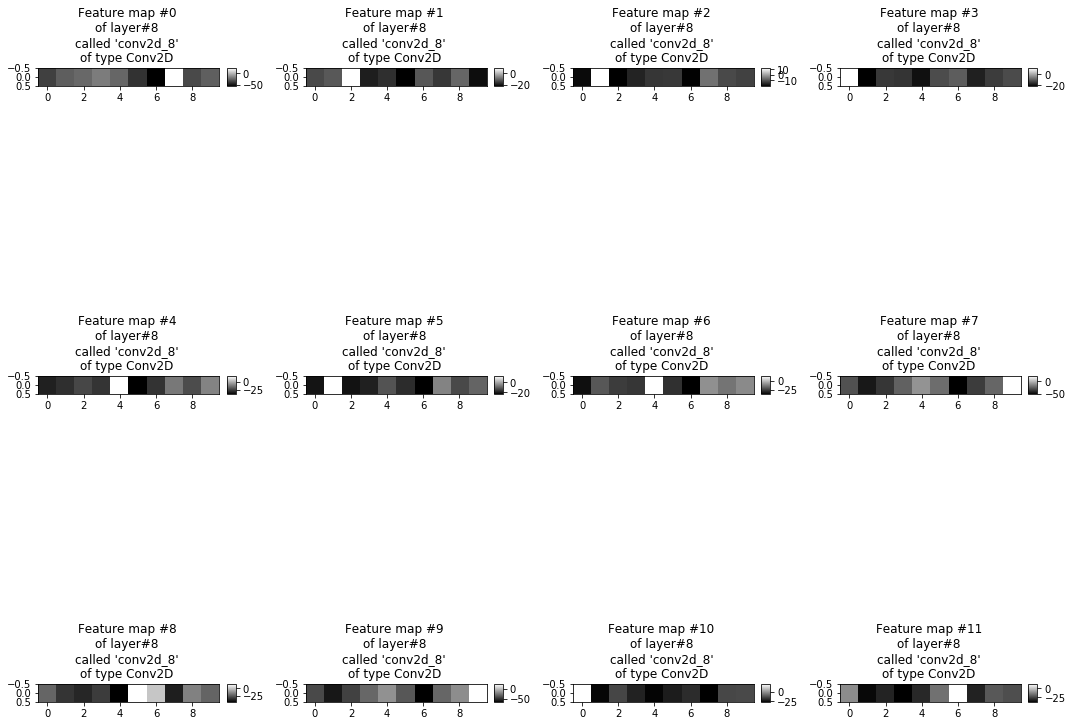

In [20]:
# Plot all the feature maps of the layer 2
# The maximum number of filters per feature maps is n=9

_ = plot_feature_map(model, 8, X_test[:12], n=9)
#_ = plot_all_feature_maps(model, X_test[:9], n=9)